In [1]:
import pandas as pd

# List of files
files = ['investment.xlsx', 'Mortality.xlsx', 'SPI.xlsx']

def process_file(file_path):
    # Load the Excel file
    df = pd.read_excel(file_path)
    
    # Loop through columns and convert those starting with "YR" to numerical types
    for col in df.columns:
        if col.startswith('YR'):
            df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Save the updated dataframe to the same file
    df.to_excel(file_path, index=False)
    print(f"Updated column types for {file_path}.")

# Process each file
for file in files:
    process_file(file)


Updated column types for investment.xlsx.
Updated column types for Mortality.xlsx.
Updated column types for SPI.xlsx.


In [2]:
df = pd.read_excel("mortality.xlsx")

df.dtypes

Series Name      object
Unnamed: 1      float64
Country Name     object
Unnamed: 3      float64
YR1990            int64
YR2000          float64
YR2014          float64
YR2015          float64
YR2016          float64
YR2017          float64
YR2018          float64
YR2019          float64
YR2020            int64
YR2021            int64
YR2022            int64
YR2023            int64
dtype: object

In [3]:
import pandas as pd

# List of countries to filter
countries_to_filter = [
    "albania", "east asia & pacific (excluding high income)", "argentina", "bangladesh", 
    "cameroon", "brazil", "philippines", "china", "colombia", "turkiye", "costa rica", 
    "cote d'ivoire", "latin america & the caribbean (ida & ibrd countries)", "russian federation", 
    "ecuador", "egypt, arab rep.", "gabon", "peru", "georgia", "south asia (ida & ibrd)", 
    "ghana", "mexico", "south asia", "east asia & pacific (ida & ibrd countries)", 
    "honduras", "india", "indonesia", "iran, islamic rep.", "iraq", "jamaica", 
    "japan", "jordan", "kazakhstan", "ibrd only", "late-demographic dividend", 
    "latin america & caribbean", "latin america & caribbean (excluding high income)", 
    "kenya", "lao pdr", "malaysia", "turkmenistan", "turks and caicos islands", "tuvalu", 
    "uganda", "ukraine", "united arab emirates", "united kingdom", "united states", 
    "uruguay", "uzbekistan", "vanuatu", "venezuela, rb", "viet nam", "virgin islands (u.s.)", 
    "west bank and gaza", "yemen, rep.", "zambia", "zimbabwe", "africa eastern and southern", 
    "africa western and central", "arab world", "caribbean small states", "central europe and the baltics", 
    "early-demographic dividend", "euro area", "europe & central asia", "europe & central asia (excluding high income)", 
    "europe & central asia (ida & ibrd countries)", "european union", "fragile and conflict affected situations", 
    "heavily indebted poor countries (hipc)", "high income", "least developed countries: un classification", 
    "low & middle income", "low income", "lower middle income", "middle income", "upper middle income"
]

# Function to filter data based on country names
def filter_countries(df, countries):
    # Convert country names to lowercase for case-insensitive comparison
    df['Country Name'] = df['Country Name'].str.lower()
    return df[df['Country Name'].isin(countries)]

# File names (new names starting with 'f')
files = {
    'investment.xlsx': 'finvestment.xlsx',
    'mortality.xlsx': 'fmortality.xlsx',
    'SPI.xlsx': 'fSPI.xlsx'
}

# Process each file
for original_file, new_file in files.items():
    df = pd.read_excel(original_file)
    
    # Filter data
    filtered_df = filter_countries(df, countries_to_filter)
    
    # Save the filtered data to a new file with the original name
    filtered_df.to_excel(new_file, index=False)
    
    print(f"Filtered data saved to '{new_file}'.")

print("All files processed.")


Filtered data saved to 'finvestment.xlsx'.
Filtered data saved to 'fmortality.xlsx'.
Filtered data saved to 'fSPI.xlsx'.
All files processed.


In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the investment data
investment_file = 'finvestment.xlsx'
df = pd.read_excel(investment_file)

# Convert columns starting with 'YR' to numerical type
for col in df.columns:
    if col.startswith('YR'):
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Initialize lists to store results
mean_investments = []
median_investments = []
growth_rates = []

# Function to calculate growth rate using linear regression
def calculate_growth_rate(values, years):
    values = np.array(values)
    years = np.array(years)
    
    # Check lengths
    if len(years) != len(values):
        print(f"Length of years: {len(years)}, Length of values: {len(values)}")
        raise ValueError("Mismatch between years and values lengths.")
    
    # Create a boolean mask to filter out NaNs
    valid = ~np.isnan(values)
    
    # Filter valid data
    valid_years = years[valid]
    valid_values = values[valid]
    
    # Check if there are enough valid data points
    if len(valid_years) < 2:
        return np.nan
    
    model = LinearRegression()
    model.fit(valid_years.reshape(-1, 1), valid_values)
    growth_rate = model.coef_[0] * 100  # Convert to percentage
    return growth_rate

# Group by country and calculate statistics
grouped = df.groupby('Country Name')

for country, group in grouped:
    # Drop non-numeric columns
    numeric_data = group.drop(columns=['Series Name', 'Country Name'])
    
    # Check that numeric_data contains the correct number of columns
    year_columns = [col for col in numeric_data.columns if col.startswith('YR')]
    years = [int(col.replace('YR', '')) for col in year_columns]
    
    for idx, row in numeric_data.iterrows():
        values = row[year_columns].values
        print(f"Country: {country}, Years: {years}, Values: {values}")
        
        # Calculate mean and median for each country
        mean_investments.append(numeric_data[year_columns].mean(axis=1).mean())
        median_investments.append(numeric_data[year_columns].median(axis=1).median())
        
        # Calculate growth rate
        growth_rate = calculate_growth_rate(values, years)
        growth_rates.append(growth_rate)

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Country Name': grouped.size().index,
    'Mean Investment': mean_investments,
    'Median Investment': median_investments,
    'Growth Rate (%)': growth_rates
})

# Save the summary DataFrame to an Excel file
summary_df.to_excel('investment_analysis_summary.xlsx', index=False)

print("Investment analysis completed and saved to 'investment_analysis_summary.xlsx'.")
print(summary_df)


Country: africa eastern and southern, Years: [1990, 2000, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], Values: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Country: africa western and central, Years: [1990, 2000, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], Values: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Country: albania, Years: [1990, 2000, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], Values: [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.846e+08 0.000e+00
 0.000e+00 0.000e+00 1.248e+08 0.000e+00 0.000e+00]
Country: arab world, Years: [1990, 2000, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], Values: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Country: argentina, Years: [1990, 2000, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], Values: [2.088e+09 1.298e+08 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
Country: bangladesh, Years: [1990, 2000, 2014, 2015, 2016, 20

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the mortality data
mortality_file = 'fmortality.xlsx'
df = pd.read_excel(mortality_file)

# Convert columns starting with 'YR' to numerical type
for col in df.columns:
    if col.startswith('YR'):
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Calculate average mortality rate for each country
df['Average Mortality Rate'] = df.filter(like='YR').mean(axis=1)

# Initialize lists to store results
countries = df['Country Name'].unique()
trends = []

# Analyze trends over time
for country in countries:
    country_data = df[df['Country Name'] == country]
    years = [int(col.replace('YR', '')) for col in df.columns if col.startswith('YR')]
    mortality_rates = country_data.filter(like='YR').values.flatten()
    
    # Remove NaN values
    valid_indices = ~np.isnan(mortality_rates)
    valid_years = np.array(years * len(country_data))[valid_indices]
    valid_mortality_rates = mortality_rates[valid_indices]
    
    # Plot trend
    plt.figure(figsize=(10, 6))
    plt.plot(valid_years, valid_mortality_rates, marker='o', linestyle='-', label=country)
    plt.xlabel('Year')
    plt.ylabel('Mortality Rate (per 100,000 population)')
    plt.title(f'Mortality Rate Trends for {country}')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'{country}_mortality_trends.png')
    plt.close()

# Print average mortality rates
print("Average Mortality Rates:")
print(df[['Country Name', 'Average Mortality Rate']])

# Save the results to an Excel file
df[['Country Name', 'Average Mortality Rate']].to_excel('average_mortality_rates.xlsx', index=False)

print("Mortality rates analysis completed and saved to 'average_mortality_rates.xlsx'.")


Average Mortality Rates:
               Country Name  Average Mortality Rate
0                   albania                7.466667
1                 argentina                7.883333
2                bangladesh                8.725000
3                    brazil               11.316667
4                  cameroon               17.050000
..                      ...                     ...
73      lower middle income               10.210552
74            middle income               10.306155
75               south asia                8.972203
76  south asia (ida & ibrd)                8.972203
77      upper middle income               10.392809

[78 rows x 2 columns]
Mortality rates analysis completed and saved to 'average_mortality_rates.xlsx'.


In [6]:
import pandas as pd
import numpy as np

# Load the SPI data
spi_file = 'fSPI.xlsx'
df = pd.read_excel(spi_file)

# Ensure that all SPI columns are numeric
# Assuming all columns are SPI columns starting with 'YR'
for col in df.columns:
    if col.startswith('YR'):
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop non-numeric columns for SPI calculations
spi_data = df.drop(columns=['Series Name', 'Country Name'])

# Calculate summary statistics
mean_spi = spi_data.mean(axis=1)
median_spi = spi_data.median(axis=1)
range_spi = spi_data.max(axis=1) - spi_data.min(axis=1)

# Add summary statistics to DataFrame
df['Mean SPI'] = mean_spi
df['Median SPI'] = median_spi
df['Range SPI'] = range_spi

# Print summary statistics
print("Summary Statistics for SPI Scores:")
print(f"Mean:\n{df['Mean SPI'].describe()}")
print(f"Median:\n{df['Median SPI'].describe()}")
print(f"Range:\n{df['Range SPI'].describe()}")

# Save the results to an Excel file
df[['Country Name', 'Mean SPI', 'Median SPI', 'Range SPI']].to_excel('spi_summary_statistics.xlsx', index=False)

print("SPI performance analysis completed and saved to 'spi_summary_statistics.xlsx'.")


Summary Statistics for SPI Scores:
Mean:
count    78.000000
mean     18.301282
std      18.185870
min       0.000000
25%       0.000000
50%      19.791667
75%      30.833333
max      58.333333
Name: Mean SPI, dtype: float64
Median:
count     78.000000
mean      26.474359
std       28.078149
min        0.000000
25%        0.000000
50%       21.250000
75%       46.875000
max      100.000000
Name: Median SPI, dtype: float64
Range:
count     78.000000
mean      37.756410
std       35.443823
min        0.000000
25%        0.000000
50%       42.500000
75%       68.750000
max      100.000000
Name: Range SPI, dtype: float64
SPI performance analysis completed and saved to 'spi_summary_statistics.xlsx'.


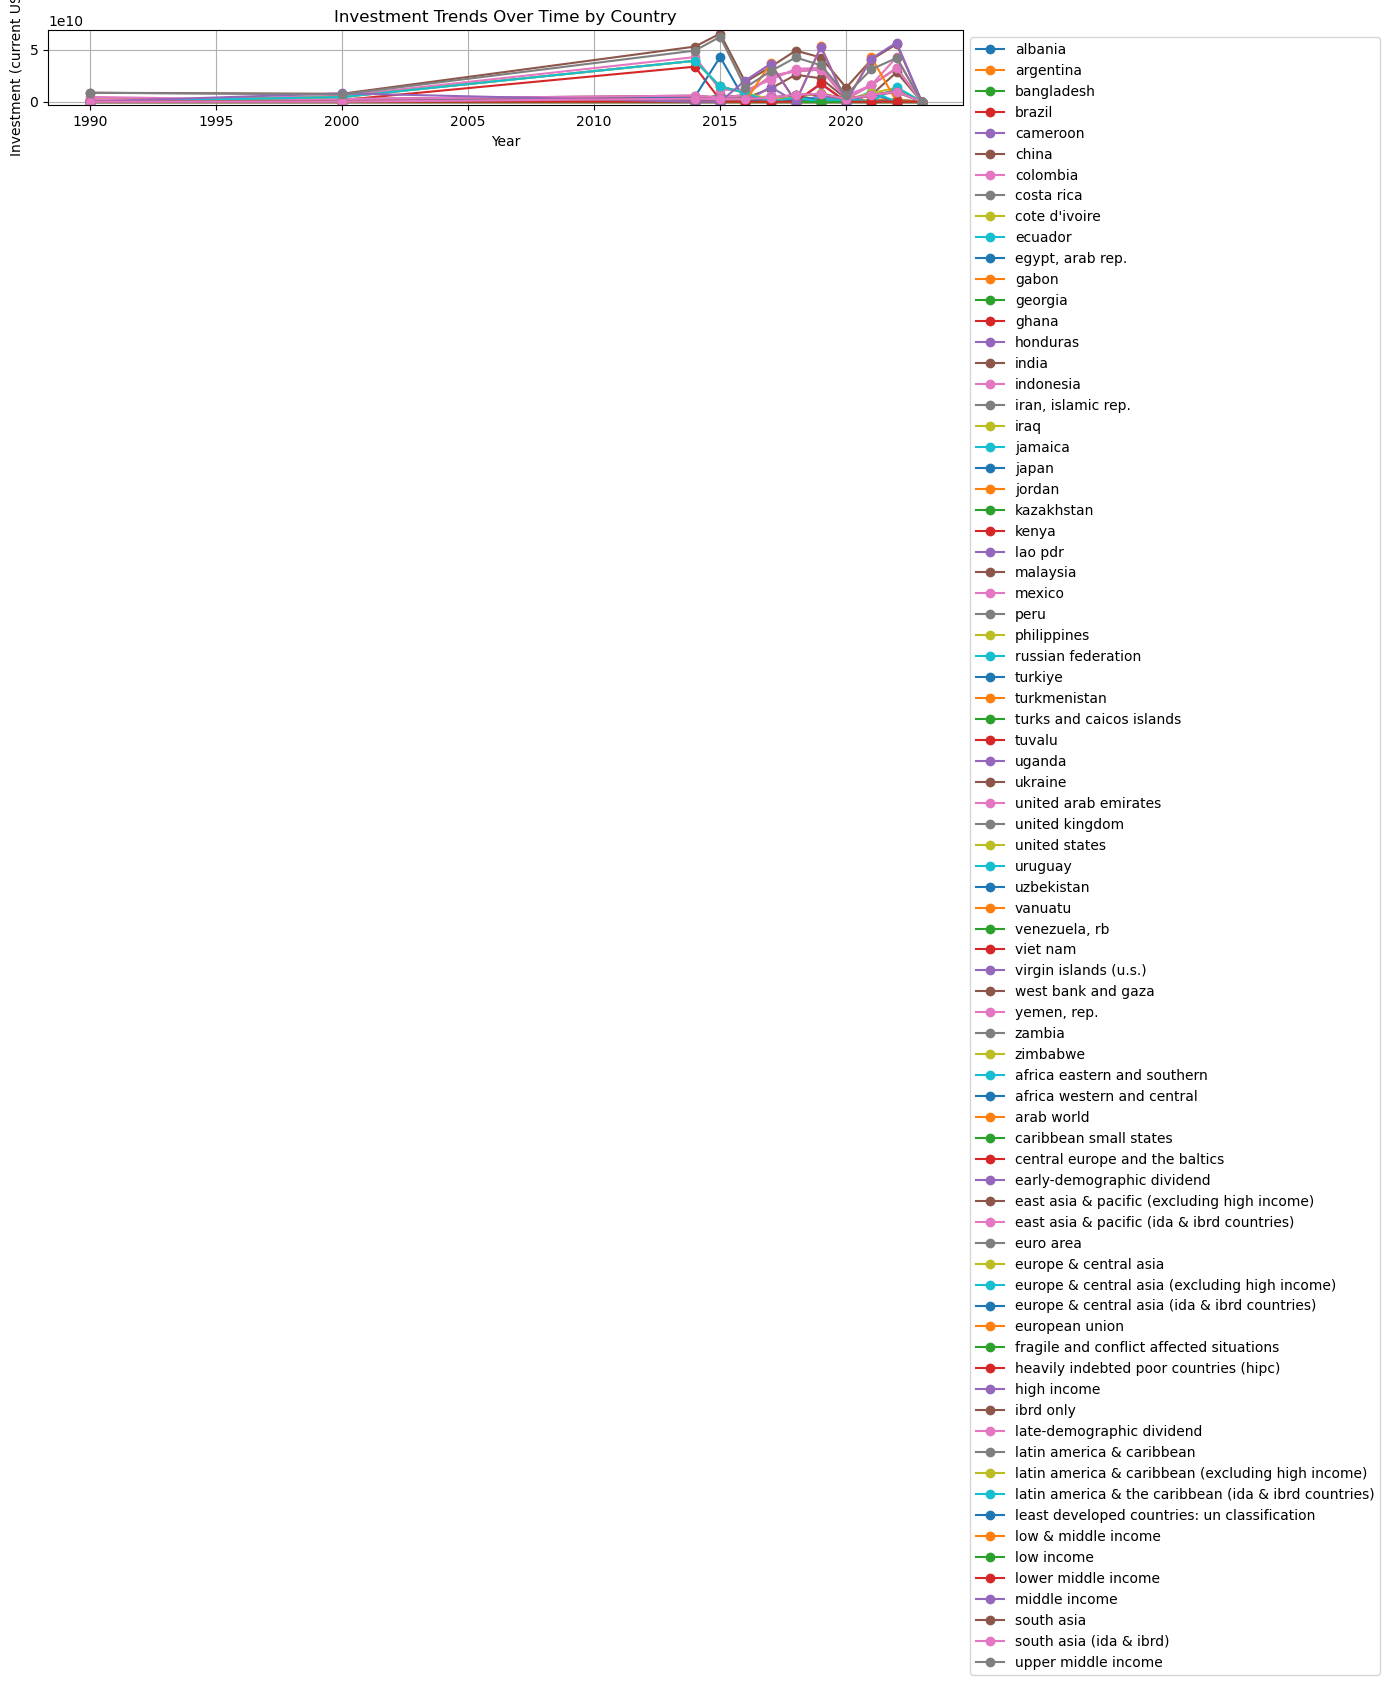

Descriptive Statistics for Investment Trends:
                    Country  Mean Investment  Median Investment  \
0                   albania     3.411667e+07       0.000000e+00   
1                 argentina     1.848167e+08       0.000000e+00   
2                bangladesh     1.939475e+08       0.000000e+00   
3                    brazil     4.966476e+09       1.328900e+09   
4                  cameroon     5.426917e+07       0.000000e+00   
..                      ...              ...                ...   
73      lower middle income     1.465617e+09       0.000000e+00   
74            middle income     1.801700e+10       4.044045e+09   
75               south asia     3.742061e+09       2.827255e+09   
76  south asia (ida & ibrd)     3.742061e+09       2.827255e+09   
77      upper middle income     2.733708e+10       3.029080e+10   

    Standard Deviation  Min Investment  Max Investment  
0         8.296829e+07               0       284600000  
1         5.749424e+08             

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the investment data
investment_file = 'finvestment.xlsx'
df = pd.read_excel(investment_file)

# Convert columns starting with 'YR' to numerical type
for col in df.columns:
    if col.startswith('YR'):
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Extract the year columns
year_columns = [col for col in df.columns if col.startswith('YR')]
years = [int(col.replace('YR', '')) for col in year_columns]

# Prepare to collect descriptive statistics
descriptive_stats = []

# Plot investment trends over time for each country
countries = df['Country Name'].unique()

plt.figure(figsize=(14, 10))

for country in countries:
    country_data = df[df['Country Name'] == country]
    investments = country_data[year_columns].values.flatten()
    
    # Remove NaN values
    valid_indices = ~np.isnan(investments)
    valid_years = np.array(years * len(country_data))[valid_indices]
    valid_investments = investments[valid_indices]
    
    # Calculate descriptive statistics
    mean_investment = np.mean(valid_investments)
    median_investment = np.median(valid_investments)
    std_dev_investment = np.std(valid_investments)
    min_investment = np.min(valid_investments)
    max_investment = np.max(valid_investments)
    
    descriptive_stats.append({
        'Country': country,
        'Mean Investment': mean_investment,
        'Median Investment': median_investment,
        'Standard Deviation': std_dev_investment,
        'Min Investment': min_investment,
        'Max Investment': max_investment
    })
    
    # Plot
    plt.plot(valid_years, valid_investments, marker='o', linestyle='-', label=country)

plt.xlabel('Year')
plt.ylabel('Investment (current US$)')
plt.title('Investment Trends Over Time by Country')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()

# Save the plot
plt.savefig('investment_trends.png')
plt.show()

# Print descriptive statistics
stats_df = pd.DataFrame(descriptive_stats)
print("Descriptive Statistics for Investment Trends:")
print(stats_df)

print("Investment trends plotted and saved to 'investment_trends.png'.")


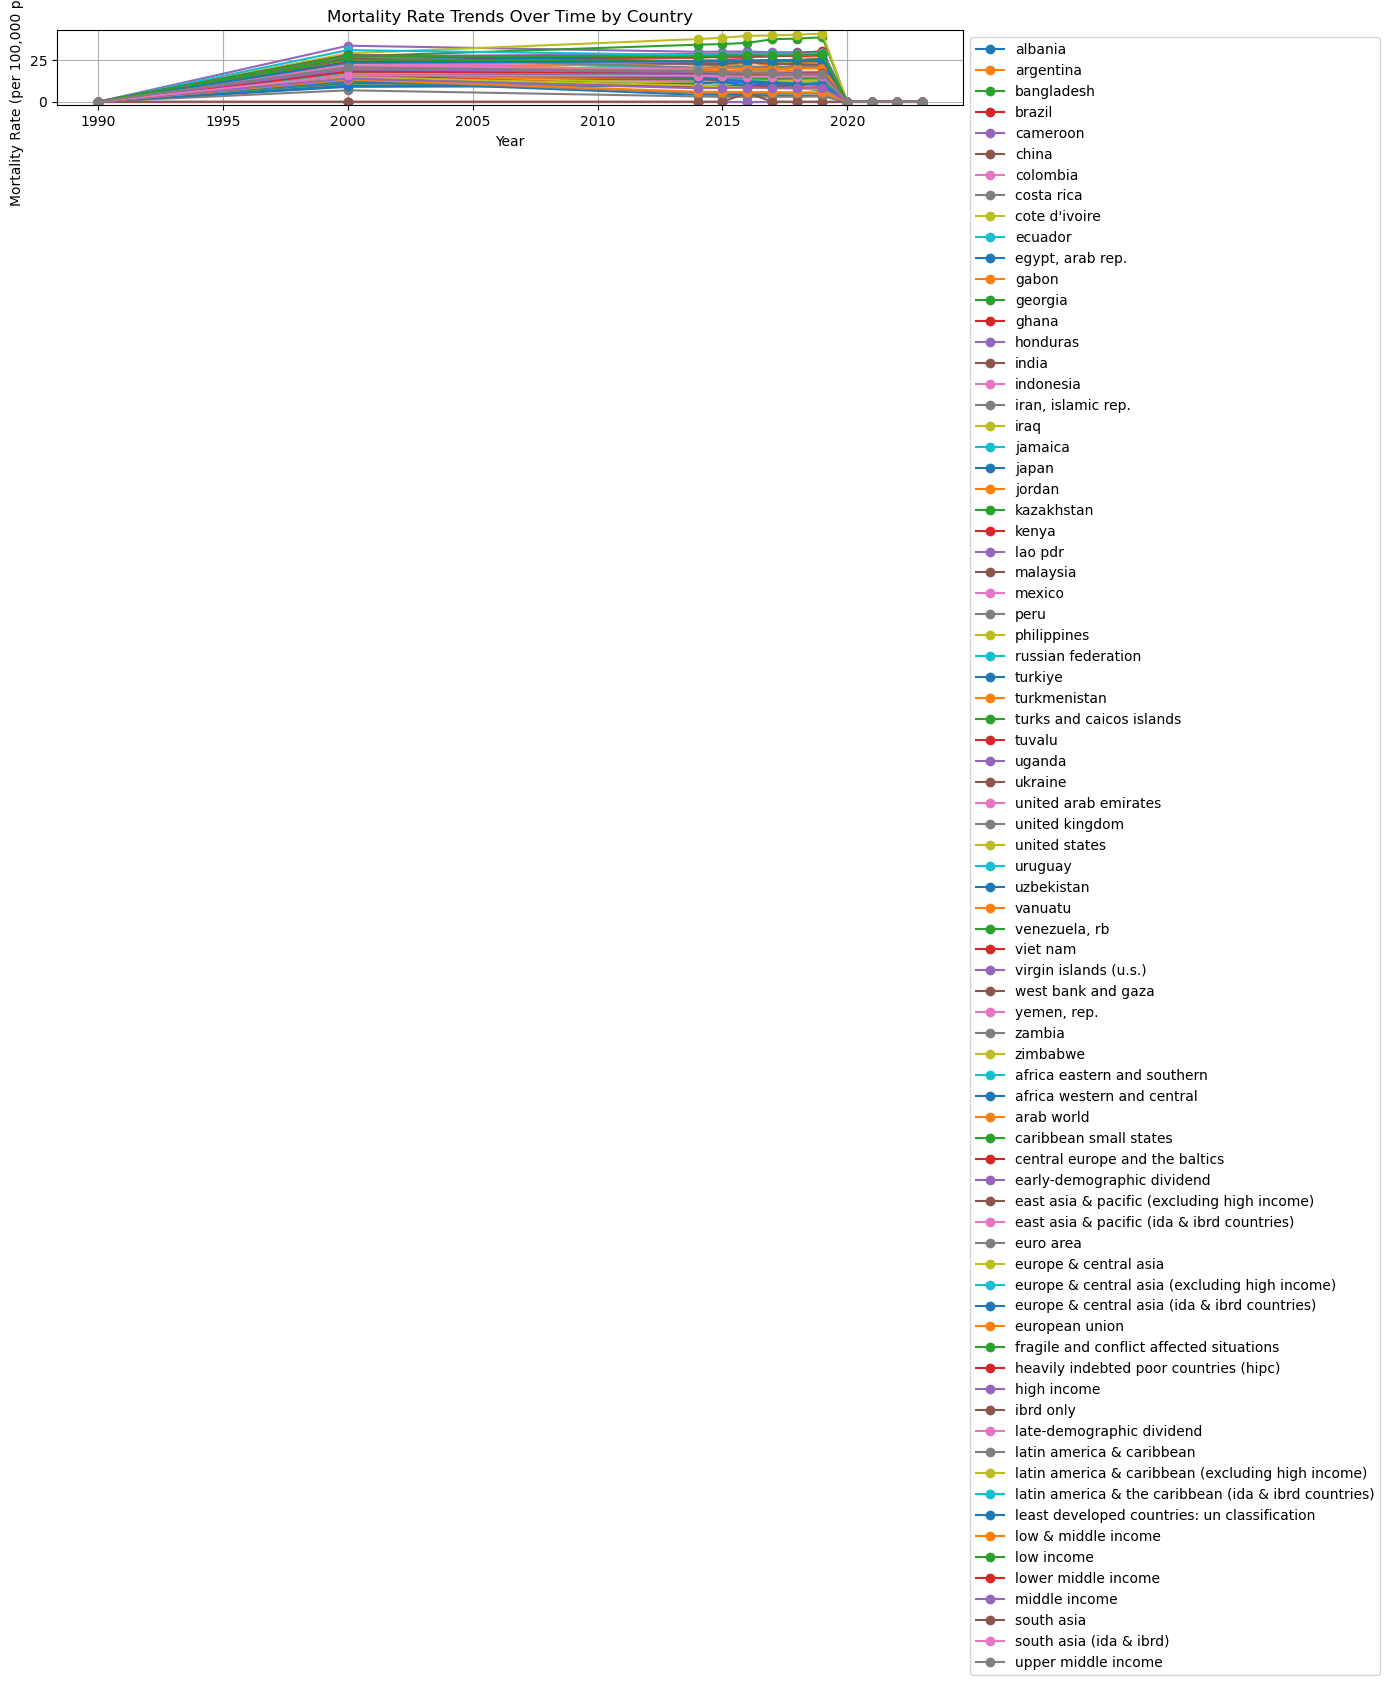

Descriptive statistics and trends saved to 'mortality_analysis.docx'.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from docx import Document
from docx.shared import Inches

# Load the mortality data
mortality_file = 'fmortality.xlsx'
df = pd.read_excel(mortality_file)

# Convert columns starting with 'YR' to numerical type
for col in df.columns:
    if col.startswith('YR'):
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Extract year columns
year_columns = [col for col in df.columns if col.startswith('YR')]
years = [int(col.replace('YR', '')) for col in year_columns]

# Prepare to collect descriptive statistics and trends
descriptive_stats = []
increasing_countries = []
decreasing_countries = []

# Plot mortality trends over time for each country
countries = df['Country Name'].unique()

plt.figure(figsize=(14, 10))

for country in countries:
    country_data = df[df['Country Name'] == country]
    mortality_rates = country_data[year_columns].values.flatten()
    
    # Remove NaN values
    valid_indices = ~np.isnan(mortality_rates)
    valid_years = np.array(years * len(country_data))[valid_indices]
    valid_mortality_rates = mortality_rates[valid_indices]
    
    # Calculate descriptive statistics
    mean_mortality = np.mean(valid_mortality_rates)
    median_mortality = np.median(valid_mortality_rates)
    std_dev_mortality = np.std(valid_mortality_rates)
    min_mortality = np.min(valid_mortality_rates)
    max_mortality = np.max(valid_mortality_rates)
    
    descriptive_stats.append({
        'Country': country,
        'Mean Mortality Rate': mean_mortality,
        'Median Mortality Rate': median_mortality,
        'Standard Deviation': std_dev_mortality,
        'Min Mortality Rate': min_mortality,
        'Max Mortality Rate': max_mortality
    })
    
    # Plot
    plt.plot(valid_years, valid_mortality_rates, marker='o', linestyle='-', label=country)
    
    # Calculate trend slope using linear regression
    if len(valid_years) > 1:  # Ensure there's more than one data point
        years_array = np.array(valid_years).reshape(-1, 1)
        mortality_array = np.array(valid_mortality_rates).reshape(-1, 1)
        model = LinearRegression()
        model.fit(years_array, mortality_array)
        trend_slope = model.coef_[0][0]
        
        if trend_slope > 0:
            increasing_countries.append(country)
        elif trend_slope < 0:
            decreasing_countries.append(country)

plt.xlabel('Year')
plt.ylabel('Mortality Rate (per 100,000 population)')
plt.title('Mortality Rate Trends Over Time by Country')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()

# Save the plot
plt.savefig('mortality_trends.png')
plt.show()

# Create a Word document
doc = Document()
doc.add_heading('Descriptive Statistics and Trends for Mortality Rates', 0)

# Add descriptive statistics to the document
doc.add_heading('Descriptive Statistics for Mortality Rates', level=1)
stats_df = pd.DataFrame(descriptive_stats)

# Convert the DataFrame to a table in the Word document
table = doc.add_table(rows=1, cols=len(stats_df.columns))
hdr_cells = table.rows[0].cells
for i, column in enumerate(stats_df.columns):
    hdr_cells[i].text = column

for index, row in stats_df.iterrows():
    row_cells = table.add_row().cells
    for i, value in enumerate(row):
        row_cells[i].text = str(value)

# Add the plot to the document
doc.add_heading('Mortality Rate Trends Over Time by Country', level=1)
doc.add_picture('mortality_trends.png', width=Inches(6))

# Add countries with increasing or decreasing mortality rates
doc.add_heading('Countries with Increasing Mortality Rates', level=1)
doc.add_paragraph(', '.join(increasing_countries))

doc.add_heading('Countries with Decreasing Mortality Rates', level=1)
doc.add_paragraph(', '.join(decreasing_countries))

# Save the document
doc.save('mortality_analysis.docx')

print("Descriptive statistics and trends saved to 'mortality_analysis.docx'.")


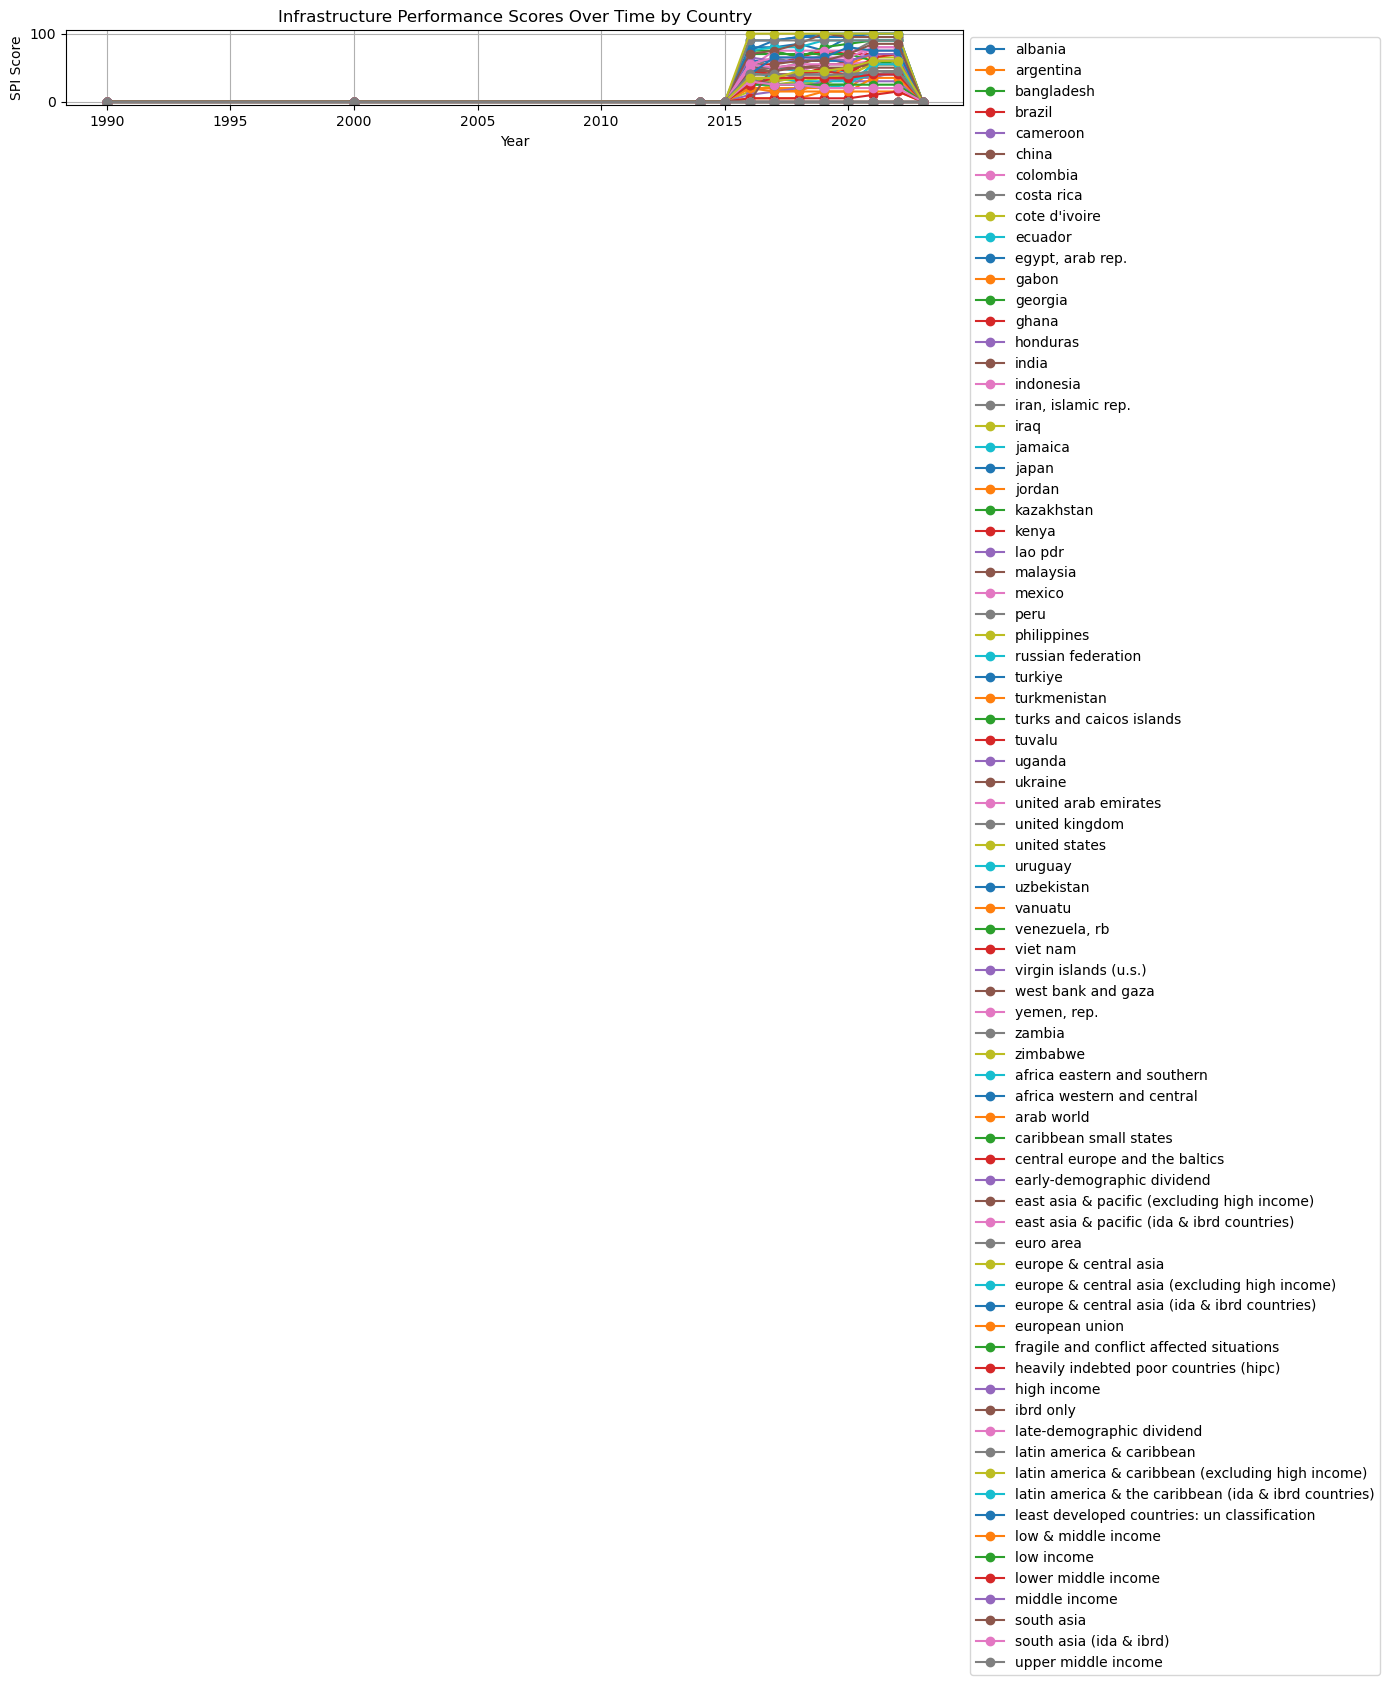

Descriptive Statistics for Infrastructure Performance Scores:
                    Country  Mean SPI Score  Median SPI Score  \
0                   albania       51.250000              77.5   
1                 argentina       24.583333              35.0   
2                bangladesh       20.833333              25.0   
3                    brazil       38.333333              55.0   
4                  cameroon       21.250000              35.0   
..                      ...             ...               ...   
73      lower middle income        0.000000               0.0   
74            middle income        0.000000               0.0   
75               south asia        0.000000               0.0   
76  south asia (ida & ibrd)        0.000000               0.0   
77      upper middle income        0.000000               0.0   

    Standard Deviation  Min SPI Score  Max SPI Score  
0            43.928208              0            100  
1            22.496142              0          

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the SPI data
spi_file = 'fSPI.xlsx'
df = pd.read_excel(spi_file)

# Convert columns starting with 'YR' to numerical type
for col in df.columns:
    if col.startswith('YR'):
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Extract year columns
year_columns = [col for col in df.columns if col.startswith('YR')]
years = [int(col.replace('YR', '')) for col in year_columns]

# Prepare to collect descriptive statistics
descriptive_stats = []

# Plot infrastructure performance scores over time for each country
countries = df['Country Name'].unique()

plt.figure(figsize=(14, 10))

for country in countries:
    country_data = df[df['Country Name'] == country]
    spi_scores = country_data[year_columns].values.flatten()
    
    # Remove NaN values
    valid_indices = ~np.isnan(spi_scores)
    valid_years = np.array(years * len(country_data))[valid_indices]
    valid_spi_scores = spi_scores[valid_indices]
    
    # Calculate descriptive statistics
    mean_spi = np.mean(valid_spi_scores)
    median_spi = np.median(valid_spi_scores)
    std_dev_spi = np.std(valid_spi_scores)
    min_spi = np.min(valid_spi_scores)
    max_spi = np.max(valid_spi_scores)
    
    descriptive_stats.append({
        'Country': country,
        'Mean SPI Score': mean_spi,
        'Median SPI Score': median_spi,
        'Standard Deviation': std_dev_spi,
        'Min SPI Score': min_spi,
        'Max SPI Score': max_spi
    })
    
    # Plot
    plt.plot(valid_years, valid_spi_scores, marker='o', linestyle='-', label=country)

plt.xlabel('Year')
plt.ylabel('SPI Score')
plt.title('Infrastructure Performance Scores Over Time by Country')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()

# Save the plot
plt.savefig('infrastructure_performance_trends.png')
plt.show()

# Print descriptive statistics
stats_df = pd.DataFrame(descriptive_stats)
print("Descriptive Statistics for Infrastructure Performance Scores:")
print(stats_df)

print("Infrastructure performance trends plotted and saved to 'infrastructure_performance_trends.png'.")


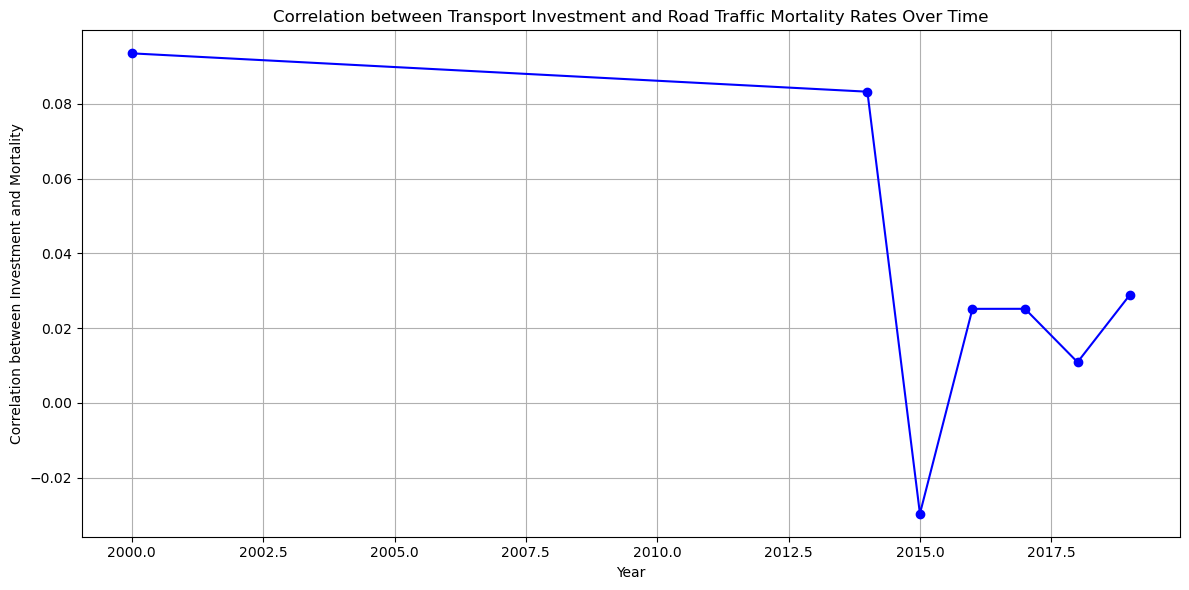

Correlation analysis completed and plot saved to 'investment_vs_mortality_correlation.png'.
Average Correlation: 0.03388590125706035

Descriptive Statistics for Correlation:
Mean Correlation: 0.0339
Median Correlation: 0.0251
Standard Deviation: 0.0423
Min Correlation: -0.0297
Max Correlation: 0.0935


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the investment and mortality data
investment_file = 'finvestment.xlsx'
mortality_file = 'fmortality.xlsx'

df_investment = pd.read_excel(investment_file)
df_mortality = pd.read_excel(mortality_file)

# Clean column names
df_investment.columns = df_investment.columns.str.strip()
df_mortality.columns = df_mortality.columns.str.strip()

# Drop unnecessary columns (e.g., 'Unnamed' columns)
df_investment = df_investment.loc[:, ~df_investment.columns.str.contains('^Unnamed')]
df_mortality = df_mortality.loc[:, ~df_mortality.columns.str.contains('^Unnamed')]

# Extract year columns
year_columns_investment = [col for col in df_investment.columns if col.startswith('YR')]
year_columns_mortality = [col for col in df_mortality.columns if col.startswith('YR')]

# Create long format DataFrames
df_investment_long = df_investment.melt(id_vars=['Country Name'], value_vars=year_columns_investment, var_name='Year', value_name='Investment')
df_mortality_long = df_mortality.melt(id_vars=['Country Name'], value_vars=year_columns_mortality, var_name='Year', value_name='Mortality')

# Remove 'YR' prefix from 'Year' column and convert to numeric
df_investment_long['Year'] = df_investment_long['Year'].str.replace('YR', '').astype(int)
df_mortality_long['Year'] = df_mortality_long['Year'].str.replace('YR', '').astype(int)

# Merge the long format DataFrames on 'Country Name' and 'Year'
merged_long = pd.merge(df_investment_long, df_mortality_long, on=['Country Name', 'Year'])

# Calculate correlation for each year
correlation_per_year = merged_long.groupby('Year').apply(lambda x: x[['Investment', 'Mortality']].corr().iloc[0, 1])

# Plot the correlations over time
plt.figure(figsize=(12, 6))
plt.plot(correlation_per_year.index, correlation_per_year.values, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Correlation between Investment and Mortality')
plt.title('Correlation between Transport Investment and Road Traffic Mortality Rates Over Time')
plt.grid(True)
plt.tight_layout()

# Save the plot
plt.savefig('investment_vs_mortality_correlation.png')
plt.show()

# Display average correlation
average_correlation = correlation_per_year.mean()
print("Correlation analysis completed and plot saved to 'investment_vs_mortality_correlation.png'.")
print("Average Correlation:", average_correlation)

# Descriptive statistics for correlations
stats = {
    'Mean Correlation': average_correlation,
    'Median Correlation': correlation_per_year.median(),
    'Standard Deviation': correlation_per_year.std(),
    'Min Correlation': correlation_per_year.min(),
    'Max Correlation': correlation_per_year.max()
}

print("\nDescriptive Statistics for Correlation:")
for key, value in stats.items():
    print(f"{key}: {value:.4f}")


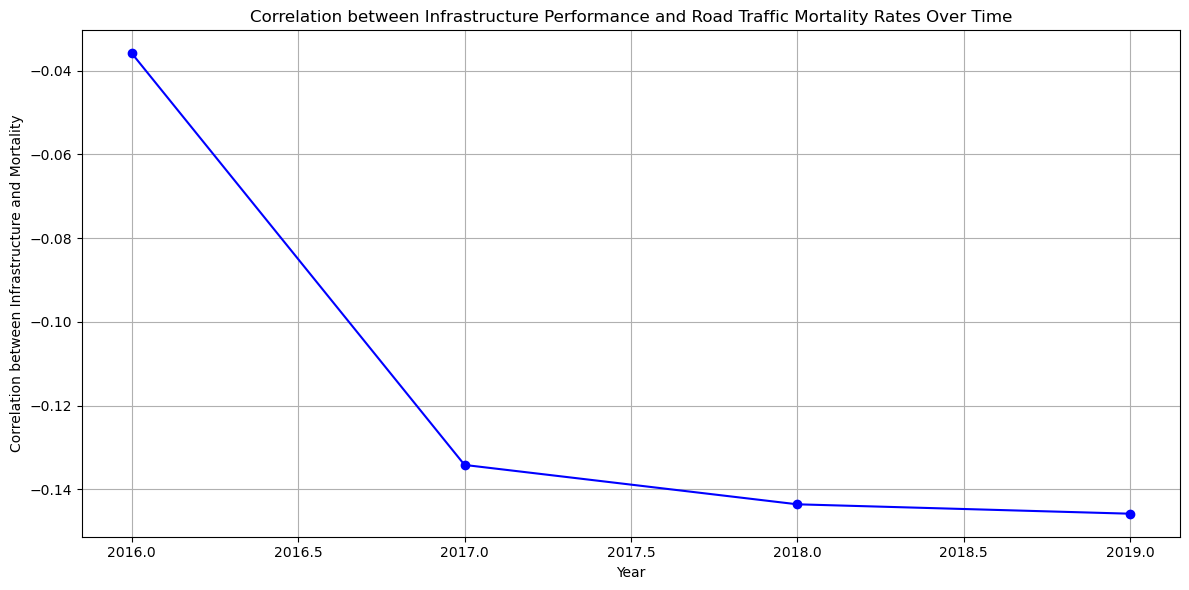

Correlation analysis completed and plot saved to 'infrastructure_vs_mortality_correlation.png'.
Average Correlation: -0.11486333612201258

Descriptive Statistics for Correlation:
Mean Correlation: -0.1149
Median Correlation: -0.1389
Standard Deviation: 0.0529
Min Correlation: -0.1458
Max Correlation: -0.0359


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the infrastructure performance and mortality data
infrastructure_file = 'fspi.xlsx'
mortality_file = 'fmortality.xlsx'

df_infrastructure = pd.read_excel(infrastructure_file)
df_mortality = pd.read_excel(mortality_file)

# Clean column names
df_infrastructure.columns = df_infrastructure.columns.str.strip()
df_mortality.columns = df_mortality.columns.str.strip()

# Drop unnecessary columns (e.g., 'Unnamed' columns)
df_infrastructure = df_infrastructure.loc[:, ~df_infrastructure.columns.str.contains('^Unnamed')]
df_mortality = df_mortality.loc[:, ~df_mortality.columns.str.contains('^Unnamed')]

# Extract year columns
year_columns_infrastructure = [col for col in df_infrastructure.columns if col.startswith('YR')]
year_columns_mortality = [col for col in df_mortality.columns if col.startswith('YR')]

# Create long format DataFrames
df_infrastructure_long = df_infrastructure.melt(id_vars=['Country Name'], value_vars=year_columns_infrastructure, var_name='Year', value_name='Infrastructure')
df_mortality_long = df_mortality.melt(id_vars=['Country Name'], value_vars=year_columns_mortality, var_name='Year', value_name='Mortality')

# Remove 'YR' prefix from 'Year' column and convert to numeric
df_infrastructure_long['Year'] = df_infrastructure_long['Year'].str.replace('YR', '').astype(int)
df_mortality_long['Year'] = df_mortality_long['Year'].str.replace('YR', '').astype(int)

# Merge the long format DataFrames on 'Country Name' and 'Year'
merged_long = pd.merge(df_infrastructure_long, df_mortality_long, on=['Country Name', 'Year'])

# Calculate correlation for each year
correlation_per_year = merged_long.groupby('Year').apply(lambda x: x[['Infrastructure', 'Mortality']].corr().iloc[0, 1])

# Plot the correlations over time
plt.figure(figsize=(12, 6))
plt.plot(correlation_per_year.index, correlation_per_year.values, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Correlation between Infrastructure and Mortality')
plt.title('Correlation between Infrastructure Performance and Road Traffic Mortality Rates Over Time')
plt.grid(True)
plt.tight_layout()

# Save the plot
plt.savefig('infrastructure_vs_mortality_correlation.png')
plt.show()

print("Correlation analysis completed and plot saved to 'infrastructure_vs_mortality_correlation.png'.")

# Display average correlation
average_correlation = correlation_per_year.mean()
print("Average Correlation:", average_correlation)

# Descriptive statistics for correlations
stats = {
    'Mean Correlation': average_correlation,
    'Median Correlation': correlation_per_year.median(),
    'Standard Deviation': correlation_per_year.std(),
    'Min Correlation': correlation_per_year.min(),
    'Max Correlation': correlation_per_year.max()
}

print("\nDescriptive Statistics for Correlation:")
for key, value in stats.items():
    print(f"{key}: {value:.4f}")


C:\Users\Nasar\AppData\Local\Temp\ipykernel_13716\2809601853.py:109: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


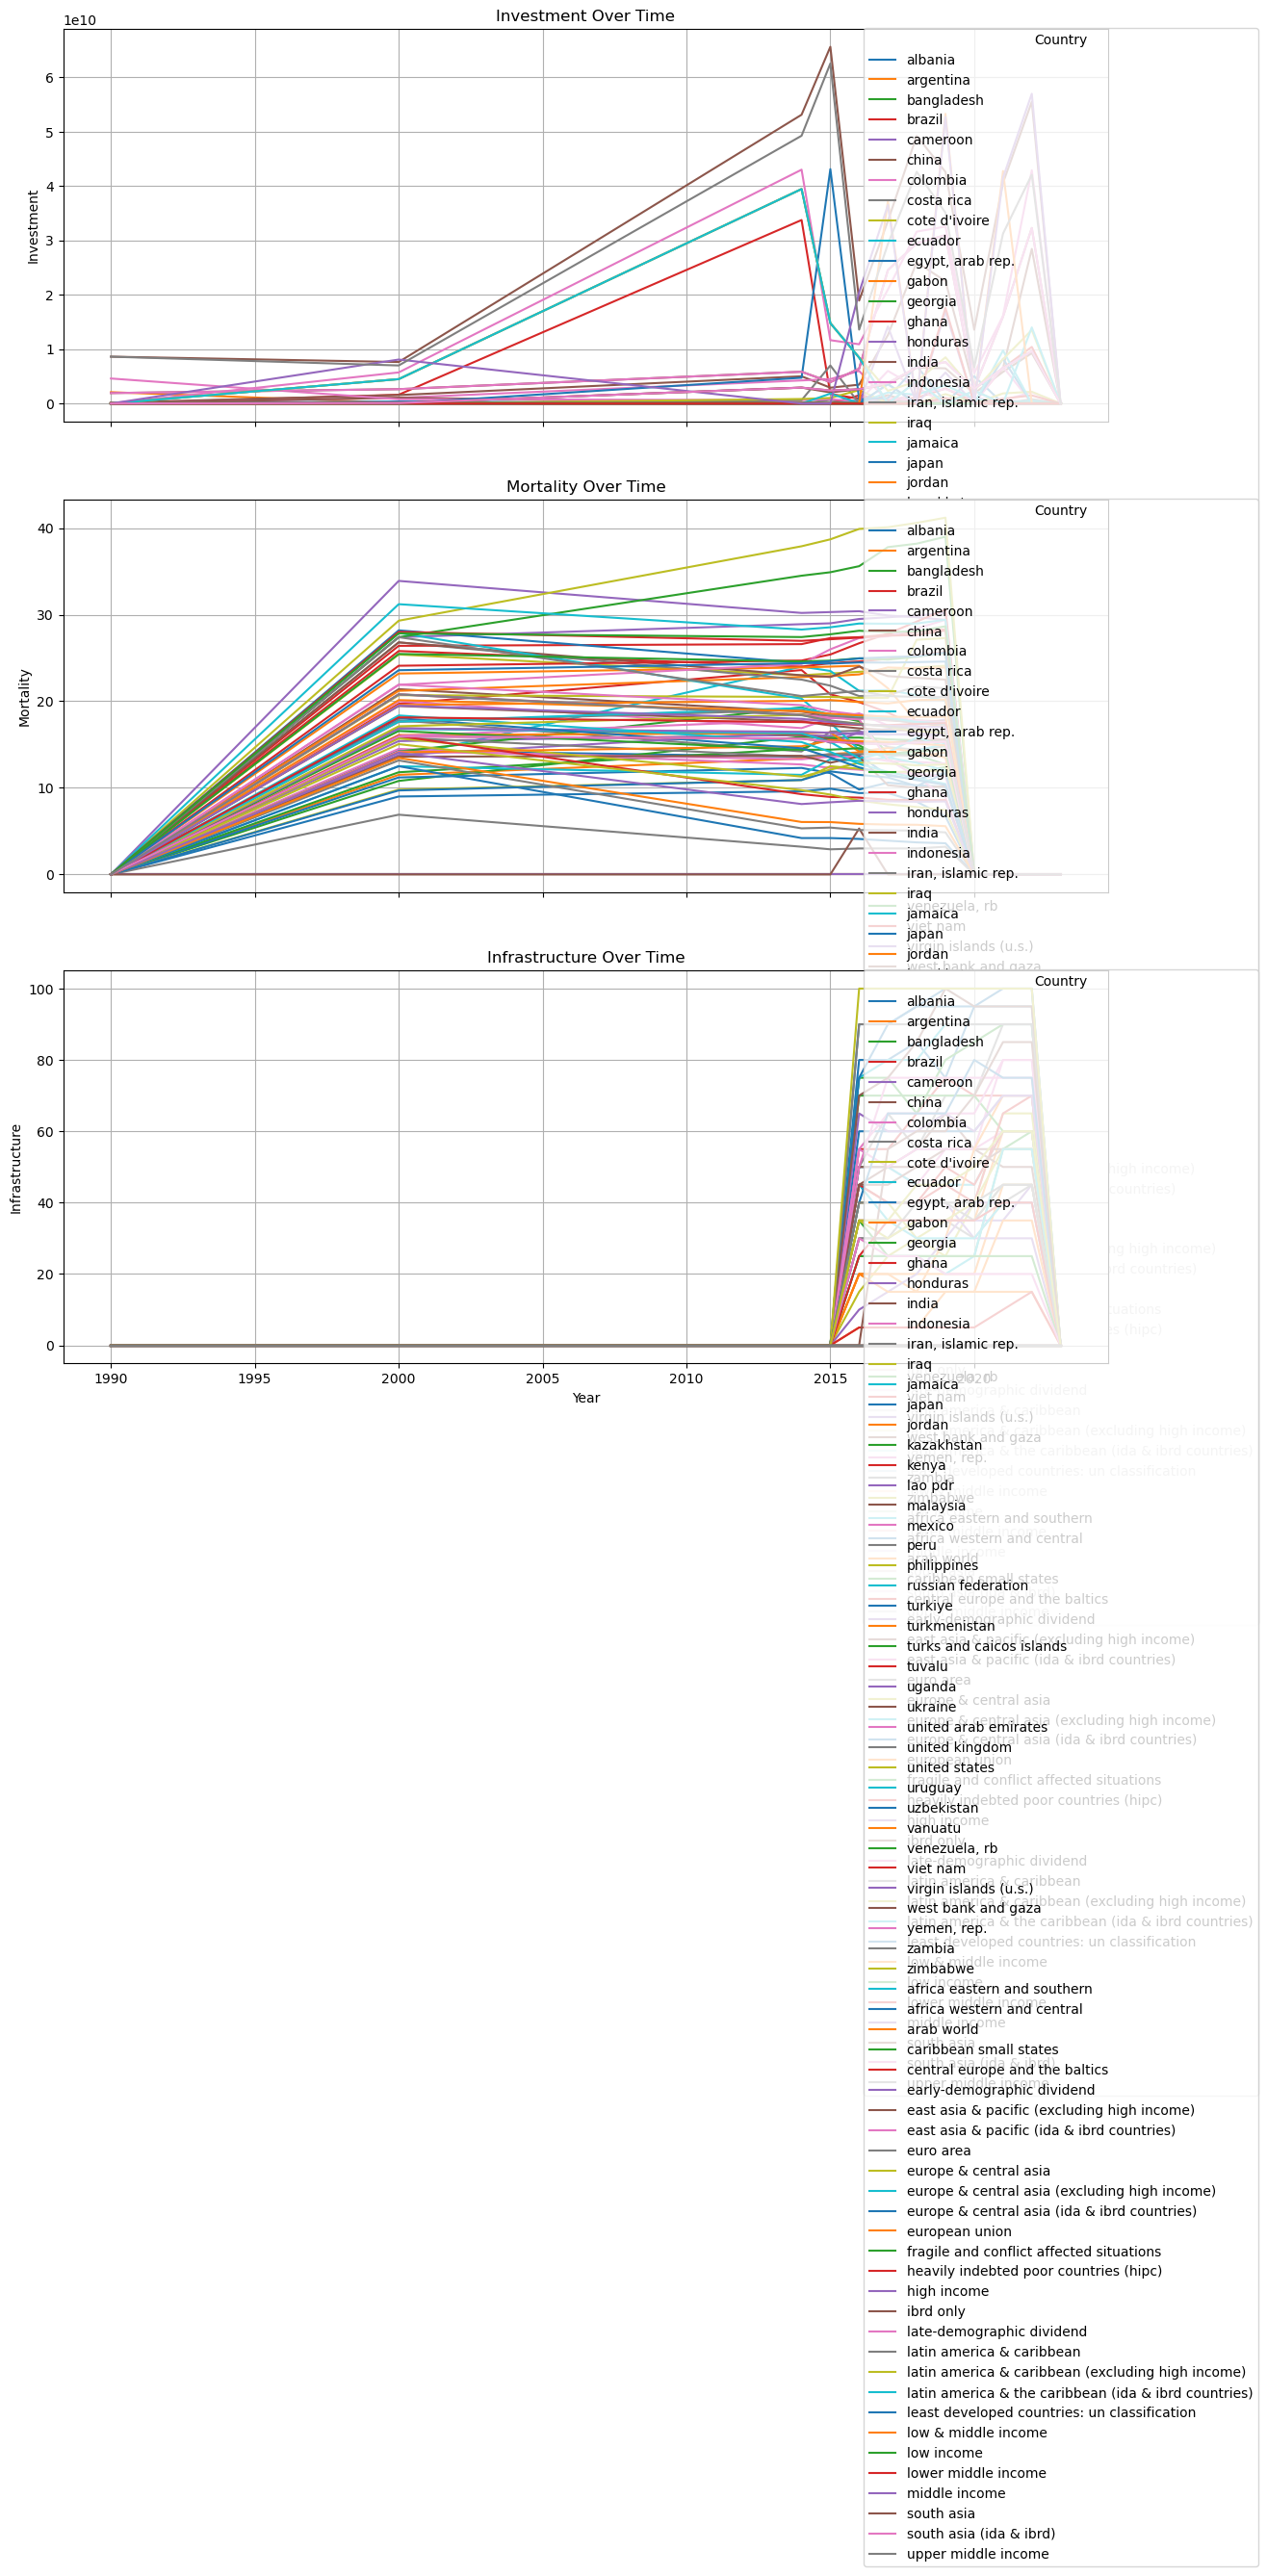

Descriptive statistics and time series plots saved to 'investment_mortality_infrastructure_analysis.docx'.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from docx import Document
from docx.shared import Inches

# Load the data from the three files
investment_file = 'finvestment.xlsx'
mortality_file = 'fmortality.xlsx'
infrastructure_file = 'fspi.xlsx'

df_investment = pd.read_excel(investment_file)
df_mortality = pd.read_excel(mortality_file)
df_infrastructure = pd.read_excel(infrastructure_file)

# Clean column names
df_investment.columns = df_investment.columns.str.strip()
df_mortality.columns = df_mortality.columns.str.strip()
df_infrastructure.columns = df_infrastructure.columns.str.strip()

# Drop unnecessary columns (e.g., 'Unnamed' columns)
df_investment = df_investment.loc[:, ~df_investment.columns.str.contains('^Unnamed')]
df_mortality = df_mortality.loc[:, ~df_mortality.columns.str.contains('^Unnamed')]
df_infrastructure = df_infrastructure.loc[:, ~df_infrastructure.columns.str.contains('^Unnamed')]

# Extract year columns
year_columns_investment = [col for col in df_investment.columns if col.startswith('YR')]
year_columns_mortality = [col for col in df_mortality.columns if col.startswith('YR')]
year_columns_infrastructure = [col for col in df_infrastructure.columns if col.startswith('YR')]

# Create long format DataFrames
df_investment_long = df_investment.melt(id_vars=['Country Name'], value_vars=year_columns_investment, var_name='Year', value_name='Investment')
df_mortality_long = df_mortality.melt(id_vars=['Country Name'], value_vars=year_columns_mortality, var_name='Year', value_name='Mortality')
df_infrastructure_long = df_infrastructure.melt(id_vars=['Country Name'], value_vars=year_columns_infrastructure, var_name='Year', value_name='Infrastructure')

# Remove 'YR' prefix from 'Year' column and convert to numeric
df_investment_long['Year'] = df_investment_long['Year'].str.replace('YR', '').astype(int)
df_mortality_long['Year'] = df_mortality_long['Year'].str.replace('YR', '').astype(int)
df_infrastructure_long['Year'] = df_infrastructure_long['Year'].str.replace('YR', '').astype(int)

# Descriptive statistics function
def get_descriptive_stats(df_long, column_name):
    stats = df_long.groupby('Country Name')[column_name].agg(['mean', 'median', 'std', 'min', 'max'])
    return stats

# Generate descriptive statistics for each measure
investment_stats = get_descriptive_stats(df_investment_long, 'Investment')
mortality_stats = get_descriptive_stats(df_mortality_long, 'Mortality')
infrastructure_stats = get_descriptive_stats(df_infrastructure_long, 'Infrastructure')

# Create a Word document
doc = Document()
doc.add_heading('Descriptive Statistics and Time Series Analysis', 0)

# Function to add descriptive statistics table to the document
def add_stats_table(doc, stats, title):
    doc.add_heading(title, level=1)
    table = doc.add_table(rows=1, cols=len(stats.columns) + 1)
    hdr_cells = table.rows[0].cells
    hdr_cells[0].text = 'Country'
    for i, column in enumerate(stats.columns):
        hdr_cells[i + 1].text = column.capitalize()

    for country, row in stats.iterrows():
        row_cells = table.add_row().cells
        row_cells[0].text = country
        for i, value in enumerate(row):
            row_cells[i + 1].text = f"{value:.2f}"

# Add descriptive statistics tables
add_stats_table(doc, investment_stats, 'Descriptive Statistics for Investment')
add_stats_table(doc, mortality_stats, 'Descriptive Statistics for Mortality')
add_stats_table(doc, infrastructure_stats, 'Descriptive Statistics for Infrastructure')

# Plot Investment, Mortality, and Infrastructure over time
fig, ax = plt.subplots(3, 1, figsize=(14, 18), sharex=True)

# Plot Investment over time
for country in df_investment_long['Country Name'].unique():
    country_data = df_investment_long[df_investment_long['Country Name'] == country]
    ax[0].plot(country_data['Year'], country_data['Investment'], label=country)

ax[0].set_title('Investment Over Time')
ax[0].set_ylabel('Investment')
ax[0].legend(loc='upper right', bbox_to_anchor=(1.15, 1.02), title='Country')
ax[0].grid(True)

# Plot Mortality over time
for country in df_mortality_long['Country Name'].unique():
    country_data = df_mortality_long[df_mortality_long['Country Name'] == country]
    ax[1].plot(country_data['Year'], country_data['Mortality'], label=country)

ax[1].set_title('Mortality Over Time')
ax[1].set_ylabel('Mortality')
ax[1].legend(loc='upper right', bbox_to_anchor=(1.15, 1.02), title='Country')
ax[1].grid(True)

# Plot Infrastructure over time
for country in df_infrastructure_long['Country Name'].unique():
    country_data = df_infrastructure_long[df_infrastructure_long['Country Name'] == country]
    ax[2].plot(country_data['Year'], country_data['Infrastructure'], label=country)

ax[2].set_title('Infrastructure Over Time')
ax[2].set_ylabel('Infrastructure')
ax[2].set_xlabel('Year')
ax[2].legend(loc='upper right', bbox_to_anchor=(1.15, 1.02), title='Country')
ax[2].grid(True)

plt.tight_layout()
plt.savefig('time_series_plots.png')
plt.show()

# Add the plot to the document
doc.add_heading('Time Series Analysis', level=1)
doc.add_picture('time_series_plots.png', width=Inches(6))

# Save the document
doc.save('investment_mortality_infrastructure_analysis.docx')

print("Descriptive statistics and time series plots saved to 'investment_mortality_infrastructure_analysis.docx'.")


Descriptive Statistics for Average Investment:

Descriptive Statistics:
count    7.800000e+01
mean     2.582582e+09
std      6.004069e+09
min      0.000000e+00
25%      0.000000e+00
50%      6.333333e+07
75%      1.296674e+09
max      3.240966e+10
Name: Investment, dtype: float64
Descriptive Statistics for Average Mortality:

Descriptive Statistics:
count    78.000000
mean      9.883245
std       4.474323
min       0.000000
25%       7.646359
50%       9.518901
75%      12.633333
max      22.308333
Name: Mortality, dtype: float64


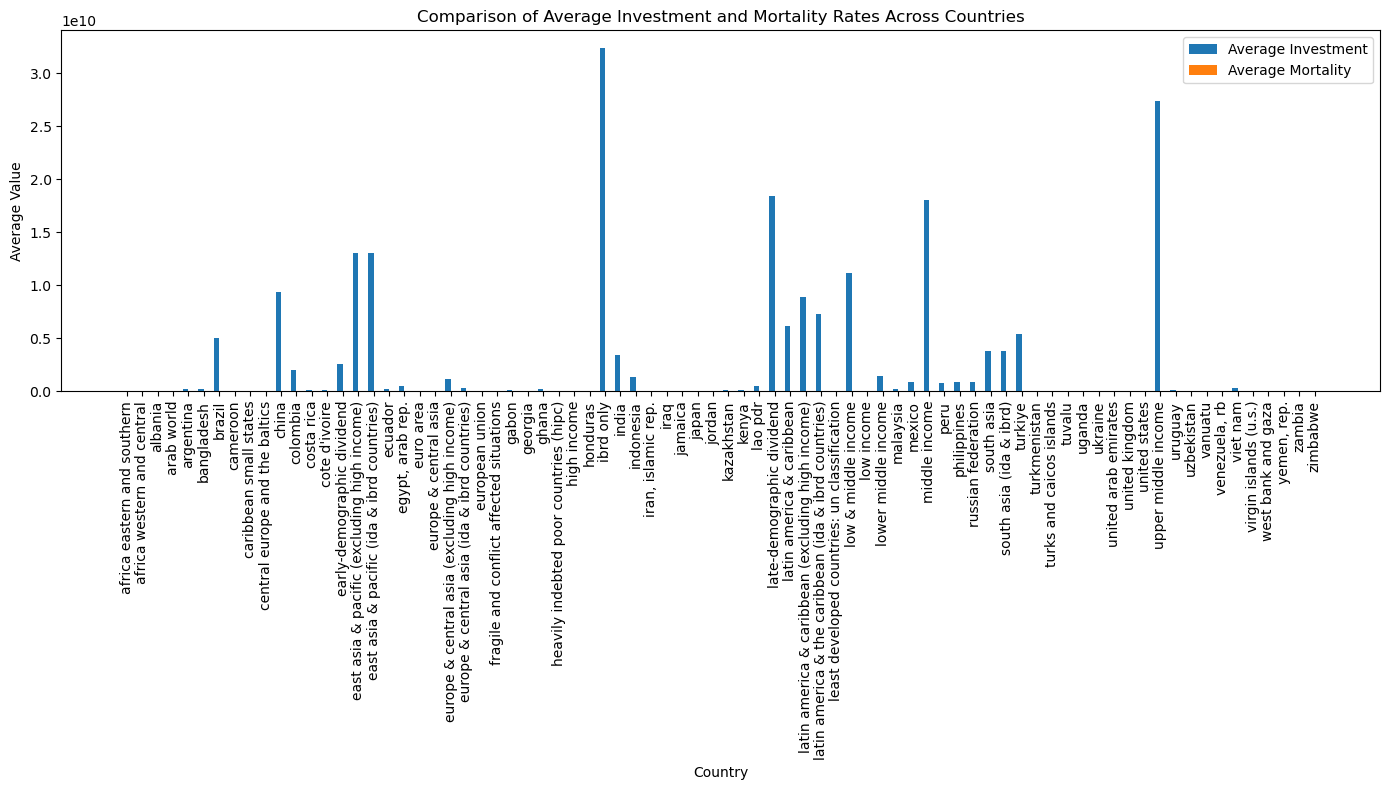

Bar charts completed and saved to 'average_comparison.png'.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the files
investment_file = 'finvestment.xlsx'
mortality_file = 'fmortality.xlsx'

df_investment = pd.read_excel(investment_file)
df_mortality = pd.read_excel(mortality_file)

# Clean column names
df_investment.columns = df_investment.columns.str.strip()
df_mortality.columns = df_mortality.columns.str.strip()

# Drop unnecessary columns (e.g., 'Unnamed' columns)
df_investment = df_investment.loc[:, ~df_investment.columns.str.contains('^Unnamed')]
df_mortality = df_mortality.loc[:, ~df_mortality.columns.str.contains('^Unnamed')]

# Extract year columns
year_columns_investment = [col for col in df_investment.columns if col.startswith('YR')]
year_columns_mortality = [col for col in df_mortality.columns if col.startswith('YR')]

# Create long format DataFrames
df_investment_long = df_investment.melt(id_vars=['Country Name'], value_vars=year_columns_investment, var_name='Year', value_name='Investment')
df_mortality_long = df_mortality.melt(id_vars=['Country Name'], value_vars=year_columns_mortality, var_name='Year', value_name='Mortality')

# Remove 'YR' prefix from 'Year' column and convert to numeric
df_investment_long['Year'] = df_investment_long['Year'].str.replace('YR', '').astype(int)
df_mortality_long['Year'] = df_mortality_long['Year'].str.replace('YR', '').astype(int)

# Calculate average values for each country, handling missing data
avg_investment = df_investment_long.groupby('Country Name')['Investment'].mean()
avg_mortality = df_mortality_long.groupby('Country Name')['Mortality'].mean()

# Merge the average values into a single DataFrame
comparison_df = pd.DataFrame({
    'Average Investment': avg_investment,
    'Average Mortality': avg_mortality
}).reset_index()

# Descriptive statistics
def print_descriptive_stats(df):
    print("\nDescriptive Statistics:")
    print(df.describe())

print("Descriptive Statistics for Average Investment:")
print_descriptive_stats(avg_investment)

print("Descriptive Statistics for Average Mortality:")
print_descriptive_stats(avg_mortality)

# Plot average investment and mortality
fig, ax = plt.subplots(figsize=(14, 8))

# Bar chart for Average Investment
bar_width = 0.35
index = range(len(comparison_df))

bars1 = ax.bar(index, comparison_df['Average Investment'], bar_width, label='Average Investment')
bars2 = ax.bar([i + bar_width for i in index], comparison_df['Average Mortality'], bar_width, label='Average Mortality')

# Add labels and title
ax.set_xlabel('Country')
ax.set_ylabel('Average Value')
ax.set_title('Comparison of Average Investment and Mortality Rates Across Countries')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(comparison_df['Country Name'], rotation=90)
ax.legend()

plt.tight_layout()
plt.savefig('average_comparison.png')
plt.show()

print("Bar charts completed and saved to 'average_comparison.png'.")


Average Investment vs Mortality Rates Data:
       Average Investment  Average Mortality
count        7.800000e+01          78.000000
mean         2.582582e+09           9.883245
std          6.004069e+09           4.474323
min          0.000000e+00           0.000000
25%          0.000000e+00           7.646359
50%          6.333333e+07           9.518901
75%          1.296674e+09          12.633333
max          3.240966e+10          22.308333

Average Infrastructure vs Mortality Rates Data:
       Average Infrastructure  Average Mortality
count               78.000000          78.000000
mean                18.301282           9.883245
std                 18.185870           4.474323
min                  0.000000           0.000000
25%                  0.000000           7.646359
50%                 19.791667           9.518901
75%                 30.833333          12.633333
max                 58.333333          22.308333


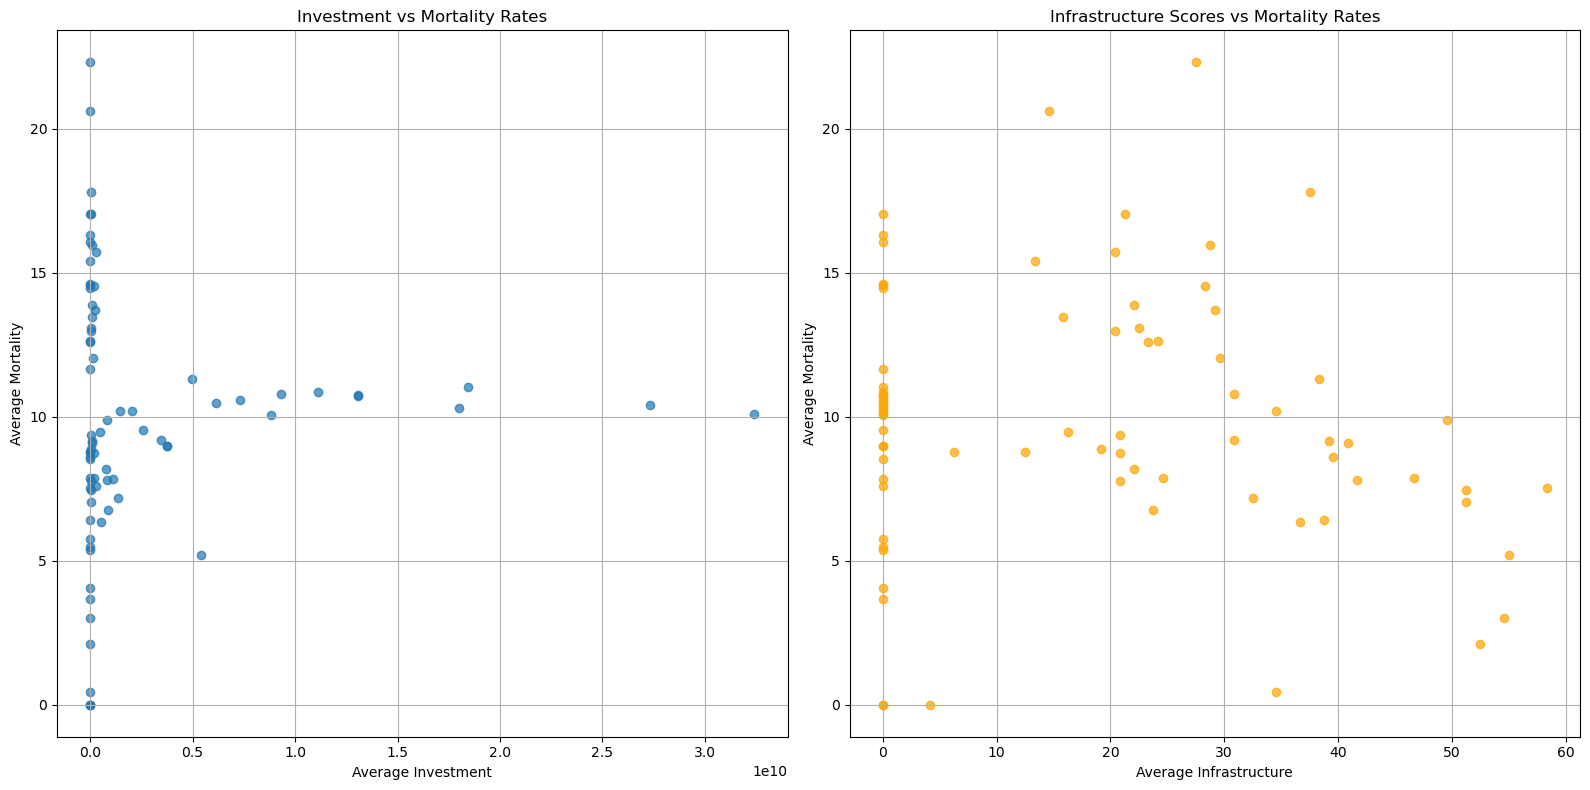

Scatter plots completed and saved to 'scatter_plots.png'.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the files
investment_file = 'finvestment.xlsx'
mortality_file = 'fmortality.xlsx'
infrastructure_file = 'fspi.xlsx'

df_investment = pd.read_excel(investment_file)
df_mortality = pd.read_excel(mortality_file)
df_infrastructure = pd.read_excel(infrastructure_file)

# Clean column names
df_investment.columns = df_investment.columns.str.strip()
df_mortality.columns = df_mortality.columns.str.strip()
df_infrastructure.columns = df_infrastructure.columns.str.strip()

# Drop unnecessary columns (e.g., 'Unnamed' columns)
df_investment = df_investment.loc[:, ~df_investment.columns.str.contains('^Unnamed')]
df_mortality = df_mortality.loc[:, ~df_mortality.columns.str.contains('^Unnamed')]
df_infrastructure = df_infrastructure.loc[:, ~df_infrastructure.columns.str.contains('^Unnamed')]

# Extract year columns
year_columns_investment = [col for col in df_investment.columns if col.startswith('YR')]
year_columns_mortality = [col for col in df_mortality.columns if col.startswith('YR')]
year_columns_infrastructure = [col for col in df_infrastructure.columns if col.startswith('YR')]

# Create long format DataFrames
df_investment_long = df_investment.melt(id_vars=['Country Name'], value_vars=year_columns_investment, var_name='Year', value_name='Investment')
df_mortality_long = df_mortality.melt(id_vars=['Country Name'], value_vars=year_columns_mortality, var_name='Year', value_name='Mortality')
df_infrastructure_long = df_infrastructure.melt(id_vars=['Country Name'], value_vars=year_columns_infrastructure, var_name='Year', value_name='Infrastructure')

# Remove 'YR' prefix from 'Year' column and convert to numeric
df_investment_long['Year'] = df_investment_long['Year'].str.replace('YR', '').astype(int)
df_mortality_long['Year'] = df_mortality_long['Year'].str.replace('YR', '').astype(int)
df_infrastructure_long['Year'] = df_infrastructure_long['Year'].str.replace('YR', '').astype(int)

# Merge the long format DataFrames on 'Country Name' and 'Year'
merged_investment_mortality = pd.merge(df_investment_long, df_mortality_long, on=['Country Name', 'Year'])
merged_infrastructure_mortality = pd.merge(df_infrastructure_long, df_mortality_long, on=['Country Name', 'Year'])

# Average values per country
avg_investment = merged_investment_mortality.groupby('Country Name')['Investment'].mean()
avg_mortality_investment = merged_investment_mortality.groupby('Country Name')['Mortality'].mean()

avg_infrastructure = merged_infrastructure_mortality.groupby('Country Name')['Infrastructure'].mean()
avg_mortality_infrastructure = merged_infrastructure_mortality.groupby('Country Name')['Mortality'].mean()

# Combine average values into DataFrames for plotting
df_investment_mortality = pd.DataFrame({
    'Average Investment': avg_investment,
    'Average Mortality': avg_mortality_investment
}).reset_index()

df_infrastructure_mortality = pd.DataFrame({
    'Average Infrastructure': avg_infrastructure,
    'Average Mortality': avg_mortality_infrastructure
}).reset_index()

# Print description of the data used for plotting
print("Average Investment vs Mortality Rates Data:")
print(df_investment_mortality.describe())

print("\nAverage Infrastructure vs Mortality Rates Data:")
print(df_infrastructure_mortality.describe())

# Create scatter plot for Investment vs Mortality
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.scatter(df_investment_mortality['Average Investment'], df_investment_mortality['Average Mortality'], alpha=0.7)
plt.xlabel('Average Investment')
plt.ylabel('Average Mortality')
plt.title('Investment vs Mortality Rates')
plt.grid(True)

# Create scatter plot for Infrastructure vs Mortality
plt.subplot(1, 2, 2)
plt.scatter(df_infrastructure_mortality['Average Infrastructure'], df_infrastructure_mortality['Average Mortality'], alpha=0.7, color='orange')
plt.xlabel('Average Infrastructure')
plt.ylabel('Average Mortality')
plt.title('Infrastructure Scores vs Mortality Rates')
plt.grid(True)

# Save and show plots
plt.tight_layout()
plt.savefig('scatter_plots.png')
plt.show()

print("Scatter plots completed and saved to 'scatter_plots.png'.")


In [19]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the data from the files
investment_file = 'finvestment.xlsx'
mortality_file = 'fmortality.xlsx'
infrastructure_file = 'fspi.xlsx'

df_investment = pd.read_excel(investment_file)
df_mortality = pd.read_excel(mortality_file)
df_infrastructure = pd.read_excel(infrastructure_file)

# Clean column names
df_investment.columns = df_investment.columns.str.strip()
df_mortality.columns = df_mortality.columns.str.strip()
df_infrastructure.columns = df_infrastructure.columns.str.strip()

# Drop unnecessary columns (e.g., 'Unnamed' columns)
df_investment = df_investment.loc[:, ~df_investment.columns.str.contains('^Unnamed')]
df_mortality = df_mortality.loc[:, ~df_mortality.columns.str.contains('^Unnamed')]
df_infrastructure = df_infrastructure.loc[:, ~df_infrastructure.columns.str.contains('^Unnamed')]

# Extract year columns
year_columns_investment = [col for col in df_investment.columns if col.startswith('YR')]
year_columns_mortality = [col for col in df_mortality.columns if col.startswith('YR')]
year_columns_infrastructure = [col for col in df_infrastructure.columns if col.startswith('YR')]

# Create long format DataFrames
df_investment_long = df_investment.melt(id_vars=['Country Name'], value_vars=year_columns_investment, var_name='Year', value_name='Investment')
df_mortality_long = df_mortality.melt(id_vars=['Country Name'], value_vars=year_columns_mortality, var_name='Year', value_name='Mortality')
df_infrastructure_long = df_infrastructure.melt(id_vars=['Country Name'], value_vars=year_columns_infrastructure, var_name='Year', value_name='Infrastructure')

# Remove 'YR' prefix from 'Year' column and convert to numeric
df_investment_long['Year'] = df_investment_long['Year'].str.replace('YR', '').astype(int)
df_mortality_long['Year'] = df_mortality_long['Year'].str.replace('YR', '').astype(int)
df_infrastructure_long['Year'] = df_infrastructure_long['Year'].str.replace('YR', '').astype(int)

# Merge the long format DataFrames on 'Country Name' and 'Year'
merged_df = pd.merge(df_investment_long, df_mortality_long, on=['Country Name', 'Year'])
merged_df = pd.merge(merged_df, df_infrastructure_long, on=['Country Name', 'Year'])

# Pivot data to get average values per country
average_df = merged_df.groupby('Country Name').agg({
    'Investment': 'mean',
    'Mortality': 'mean',
    'Infrastructure': 'mean'
}).reset_index()

# Define features and target variable
X = average_df[['Investment', 'Infrastructure']]
y = average_df['Mortality']

# Add constant term for intercept
X = sm.add_constant(X)

# Perform regression analysis using statsmodels
model = sm.OLS(y, X).fit()
print(model.summary())

# For scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_pred = lin_reg.predict(X_test)

# Model Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


                            OLS Regression Results                            
Dep. Variable:              Mortality   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.3986
Date:                Sun, 21 Jul 2024   Prob (F-statistic):              0.673
Time:                        22:31:01   Log-Likelihood:                -226.63
No. Observations:                  78   AIC:                             459.3
Df Residuals:                      75   BIC:                             466.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             10.3446      0.826     12.

Average Data Used for PCA:
         Investment  Mortality  Infrastructure
count  7.800000e+01  78.000000       78.000000
mean   2.582582e+09   9.883245       18.301282
std    6.004069e+09   4.474323       18.185870
min    0.000000e+00   0.000000        0.000000
25%    0.000000e+00   7.646359        0.000000
50%    6.333333e+07   9.518901       19.791667
75%    1.296674e+09  12.633333       30.833333
max    3.240966e+10  22.308333       58.333333


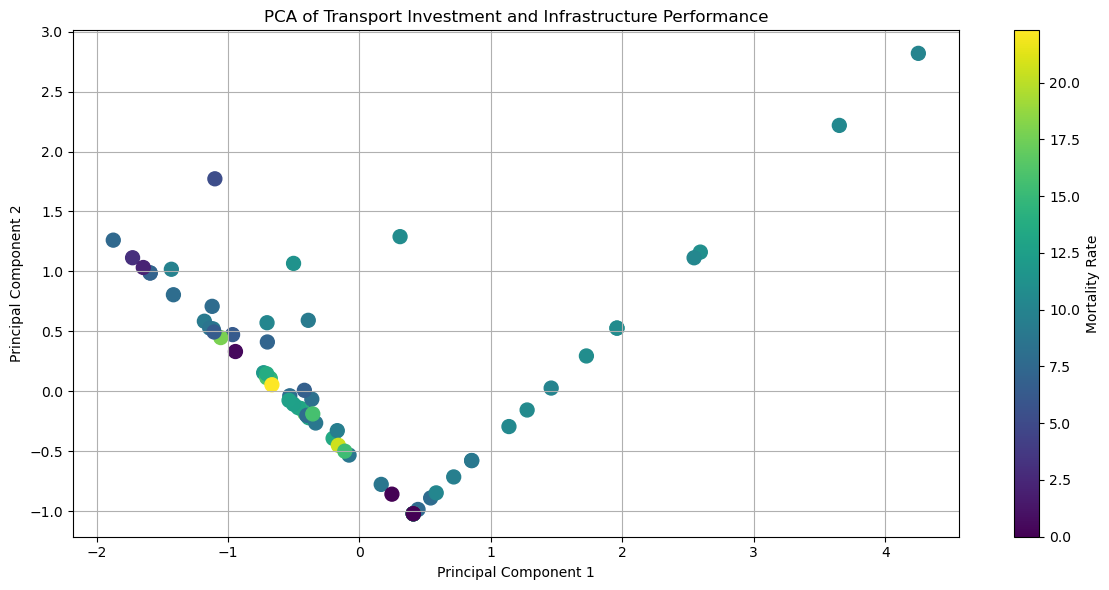

Explained Variance Ratio: [0.64859045 0.35140955]

PCA Components:
     Investment  Infrastructure
PC1    0.707107       -0.707107
PC2    0.707107        0.707107


In [20]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data from the files
investment_file = 'finvestment.xlsx'
mortality_file = 'fmortality.xlsx'
infrastructure_file = 'fspi.xlsx'

df_investment = pd.read_excel(investment_file)
df_mortality = pd.read_excel(mortality_file)
df_infrastructure = pd.read_excel(infrastructure_file)

# Clean column names
df_investment.columns = df_investment.columns.str.strip()
df_mortality.columns = df_mortality.columns.str.strip()
df_infrastructure.columns = df_infrastructure.columns.str.strip()

# Drop unnecessary columns (e.g., 'Unnamed' columns)
df_investment = df_investment.loc[:, ~df_investment.columns.str.contains('^Unnamed')]
df_mortality = df_mortality.loc[:, ~df_mortality.columns.str.contains('^Unnamed')]
df_infrastructure = df_infrastructure.loc[:, ~df_infrastructure.columns.str.contains('^Unnamed')]

# Extract year columns
year_columns_investment = [col for col in df_investment.columns if col.startswith('YR')]
year_columns_mortality = [col for col in df_mortality.columns if col.startswith('YR')]
year_columns_infrastructure = [col for col in df_infrastructure.columns if col.startswith('YR')]

# Create long format DataFrames
df_investment_long = df_investment.melt(id_vars=['Country Name'], value_vars=year_columns_investment, var_name='Year', value_name='Investment')
df_mortality_long = df_mortality.melt(id_vars=['Country Name'], value_vars=year_columns_mortality, var_name='Year', value_name='Mortality')
df_infrastructure_long = df_infrastructure.melt(id_vars=['Country Name'], value_vars=year_columns_infrastructure, var_name='Year', value_name='Infrastructure')

# Remove 'YR' prefix from 'Year' column and convert to numeric
df_investment_long['Year'] = df_investment_long['Year'].str.replace('YR', '').astype(int)
df_mortality_long['Year'] = df_mortality_long['Year'].str.replace('YR', '').astype(int)
df_infrastructure_long['Year'] = df_infrastructure_long['Year'].str.replace('YR', '').astype(int)

# Merge the long format DataFrames on 'Country Name' and 'Year'
merged_df = pd.merge(df_investment_long, df_mortality_long, on=['Country Name', 'Year'])
merged_df = pd.merge(merged_df, df_infrastructure_long, on=['Country Name', 'Year'])

# Pivot data to get average values per country
average_df = merged_df.groupby('Country Name').agg({
    'Investment': 'mean',
    'Mortality': 'mean',
    'Infrastructure': 'mean'
}).reset_index()

# Print statistics about the average data used for PCA
print("Average Data Used for PCA:")
print(average_df.describe())

# Prepare data for PCA
X = average_df[['Investment', 'Infrastructure']]
y = average_df['Mortality']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create DataFrame for PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Country Name'] = average_df['Country Name']
pca_df['Mortality'] = y

# Plot PCA results
plt.figure(figsize=(12, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=pca_df['Mortality'], cmap='viridis', s=100)
plt.colorbar(label='Mortality Rate')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Transport Investment and Infrastructure Performance')
plt.grid(True)
plt.tight_layout()

# Save the plot
plt.savefig('pca_analysis.png')
plt.show()

# Print explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Print the PCA components
print("\nPCA Components:")
print(pd.DataFrame(pca.components_, columns=['Investment', 'Infrastructure'], index=['PC1', 'PC2']))
